In [1]:
%matplotlib inline
import collections
import math
import numpy as np
from matplotlib import pyplot as plt
import os
from scipy import stats
from apt_toolkit.utils.base import path_utils
from apt_toolkit.utils import vector_utils
import seaborn as sns
import pandas as pd

DATA_PATH='../example_data/snli_svm.json'

In [3]:
from paralysis.parameter_ablation import ParameterAnalyser
pa = ParameterAnalyser(data=DATA_PATH, label_name='result')
pa.fit_ols(anova_type=3)

print(pa.anova_table_fmt_)

                          sum_sq   df            F         PR(>F)  \
composition_method  6.795009e+00  5.0  9008.199930  1.765237e-108   
C                   2.683749e-03  2.0     8.894671   3.250412e-04   
ngram_max           2.096864e-04  2.0     0.694958   5.020832e-01   
binarise            2.533883e-07  1.0     0.001680   9.674117e-01   

                    partial_sum_sq  pct_explained  
composition_method    9.978028e-01      99.780282  
C                     3.940911e-04       0.039409  
ngram_max             3.079108e-05       0.003079  
binarise              3.720841e-08       0.000004  


ValueError: Could not interpret input 'parameter'

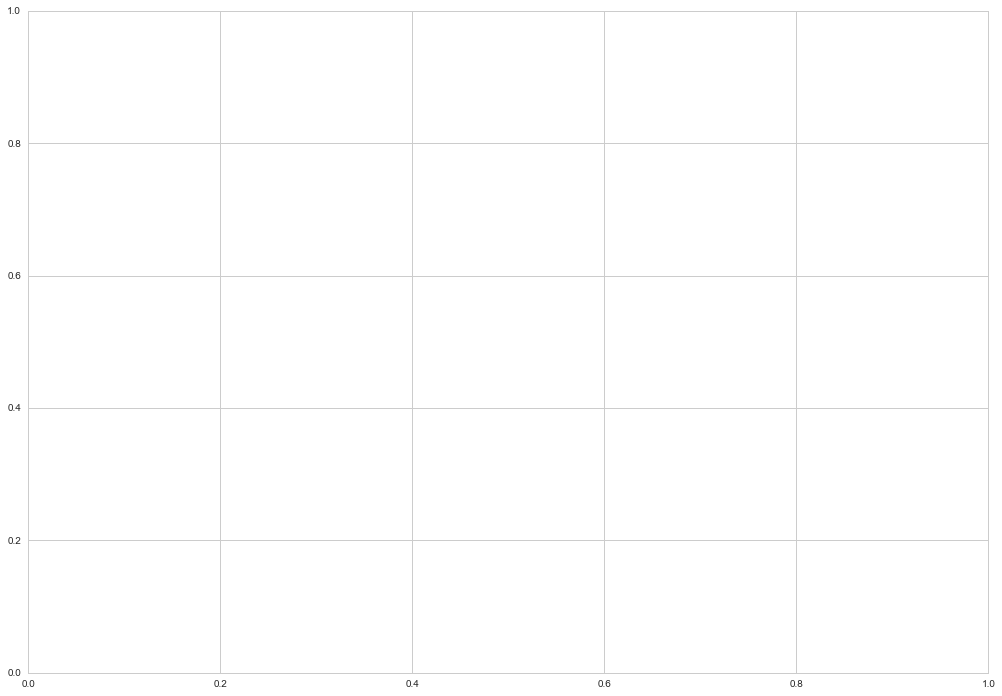

In [3]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(17.21, 11.86), dpi=900, facecolor='w', edgecolor='k')
plt.hold(True)
plt.grid(True)

sns.pointplot(x="pct_explained", y="parameter", data=pa.anova_table_fmt_, join=False, palette="deep",
              markers=["*"], scale=2.5, ci=None)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(32)

for tock in ax.yaxis.get_major_ticks():
    tock.label.set_fontsize(32)
leg = plt.legend(bbox_to_anchor=(1., 0.37), fancybox=True, fontsize=32)
plt.xlabel('Variance explained (%)', fontsize=42)
plt.ylabel('Parameter', fontsize=42)
#plt.savefig(os.path.join(out_path, 'param_ablation_wordsim_2.png'), bbox_extra_artists=(leg,), bbox_inches='tight', ncol=3)